# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
任天堂
キーエンス
ファストリ
中外薬
ＮＴＴ
リクルート
三井住友ＦＧ
ＫＤＤＩ
伊藤忠
東京海上
ＳＢＧ
三菱商
ＳＢ
東エレク
三菱重
信越化
ＪＴ
みずほＦＧ
三井物
ホンダ
第一三共
武田
富士通
ＨＯＹＡ
キヤノン
三菱電
['7203', '6758', '8306', '6501', '7974', '6861', '9983', '4519', '9432', '6098', '8316', '9433', '8001', '8766', '9984', '8058', '9434', '8035', '7011', '4063', '2914', '8411', '8031', '7267', '4568', '4502', '6702', '7741', '7751', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [11]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,7974,6861,9983,4519,9432,6098,...,2914,8411,8031,7267,4568,4502,6702,7741,7751,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.988840,0.973763,0.983236,0.984000,0.994455,...,0.972455,0.992525,0.970608,1.031250,0.994916,0.994306,0.986138,0.988415,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.988193,0.979355,0.999574,0.983333,1.001085,...,0.990419,0.978256,0.975727,1.032280,0.994113,0.995401,0.964055,1.003673,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993692,0.993548,1.007387,0.992000,0.993370,...,0.993772,0.986410,0.987450,1.025412,0.996521,0.992992,0.964055,1.006782,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.991389,0.989588,0.973799,0.983656,1.000426,0.994573,0.970787,...,1.005749,0.960362,0.988415,0.973980,0.989749,0.999776,1.011334,0.998294,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.930571,0.923372,0.945819,0.947527,0.965904,0.981683,0.924312,...,0.985389,0.917554,0.940060,0.944093,0.947127,0.987690,0.955635,0.954494,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.925188,0.932049,0.936115,0.955699,0.964342,0.980326,0.940488,...,0.995928,0.917101,0.948623,0.945851,1.004316,1.009176,0.960492,0.937713,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.932992,0.951685,0.935145,0.991398,0.935502,0.968114,0.977064,...,0.986826,0.908494,0.936199,0.957103,0.966280,0.997762,0.957416,0.936291,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.872713,0.920632,0.898916,0.974194,0.941611,0.966757,0.961251,...,0.969581,0.836240,0.914876,0.934951,0.979768,1.016115,0.929080,0.893629,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.821851,0.911225,0.884522,0.965591,0.945305,0.977612,0.896910,...,0.973892,0.742242,0.890698,0.883966,0.976531,1.002014,0.909812,0.889647,0.880214,0.869797


In [12]:
summary

,7203,6758,8306,6501,7974,6861,9983,4519,9432,6098,...,2914,8411,8031,7267,4568,4502,6702,7741,7751,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.988840,0.973763,0.983236,0.984000,0.994455,...,0.972455,0.992525,0.970608,1.031250,0.994916,0.994306,0.986138,0.988415,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.988193,0.979355,0.999574,0.983333,1.001085,...,0.990419,0.978256,0.975727,1.032280,0.994113,0.995401,0.964055,1.003673,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993692,0.993548,1.007387,0.992000,0.993370,...,0.993772,0.986410,0.987450,1.025412,0.996521,0.992992,0.964055,1.006782,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.991389,0.989588,0.973799,0.983656,1.000426,0.994573,0.970787,...,1.005749,0.960362,0.988415,0.973980,0.989749,0.999776,1.011334,0.998294,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.930571,0.923372,0.945819,0.947527,0.965904,0.981683,0.924312,...,0.985389,0.917554,0.940060,0.944093,0.947127,0.987690,0.955635,0.954494,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.925188,0.932049,0.936115,0.955699,0.964342,0.980326,0.940488,...,0.995928,0.917101,0.948623,0.945851,1.004316,1.009176,0.960492,0.937713,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.932992,0.951685,0.935145,0.991398,0.935502,0.968114,0.977064,...,0.986826,0.908494,0.936199,0.957103,0.966280,0.997762,0.957416,0.936291,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.872713,0.920632,0.898916,0.974194,0.941611,0.966757,0.961251,...,0.969581,0.836240,0.914876,0.934951,0.979768,1.016115,0.929080,0.893629,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.821851,0.911225,0.884522,0.965591,0.945305,0.977612,0.896910,...,0.973892,0.742242,0.890698,0.883966,0.976531,1.002014,0.909812,0.889647,0.880214,0.869797


In [13]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.224606
7974    1.128870
2914    1.074970
9433    1.073140
7011    1.050621
7267    1.043601
9983    1.032043
9434    1.028222
7741    1.027019
9432    1.025102
6702    1.021373
6861    1.016335
4063    1.013429
7203    1.000540
4568    0.998651
6098    0.995896
4502    0.989033
6501    0.988428
8001    0.985309
6758    0.968847
6503    0.966804
8035    0.962528
8058    0.959484
8031    0.934352
7751    0.931785
9984    0.925625
8766    0.924247
8306    0.810590
8316    0.806785
8411    0.778482
Name: 2025-05-02 00:00:00, dtype: float64

In [14]:
list_ranking = df_ranking.index[0:14]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-30    1.167637
2025-05-01    1.198892
2025-05-02    1.224606
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-04-30    1.080464
2025-05-01    1.109234
2025-05-02    1.128870
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-30    1.055569
2025-05-01    1.063473
2025-05-02    1.074970
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-30    1.051677
2025-05-01    1.056470
2025-05-02    1.073140
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-30    1.052503
2025-05-01    1.059277
2025-05-02    1.050621
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-30    1.021800
2025-05-01    1.030239
2025-05-02    1.043601
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-30    1.010323
2025-05-01    1.012043
2025-05-02    1.032043
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-30    1.015522
2025-05-01    1.018815
2025-05-02    1.028222
Name: Close, dtype: fl

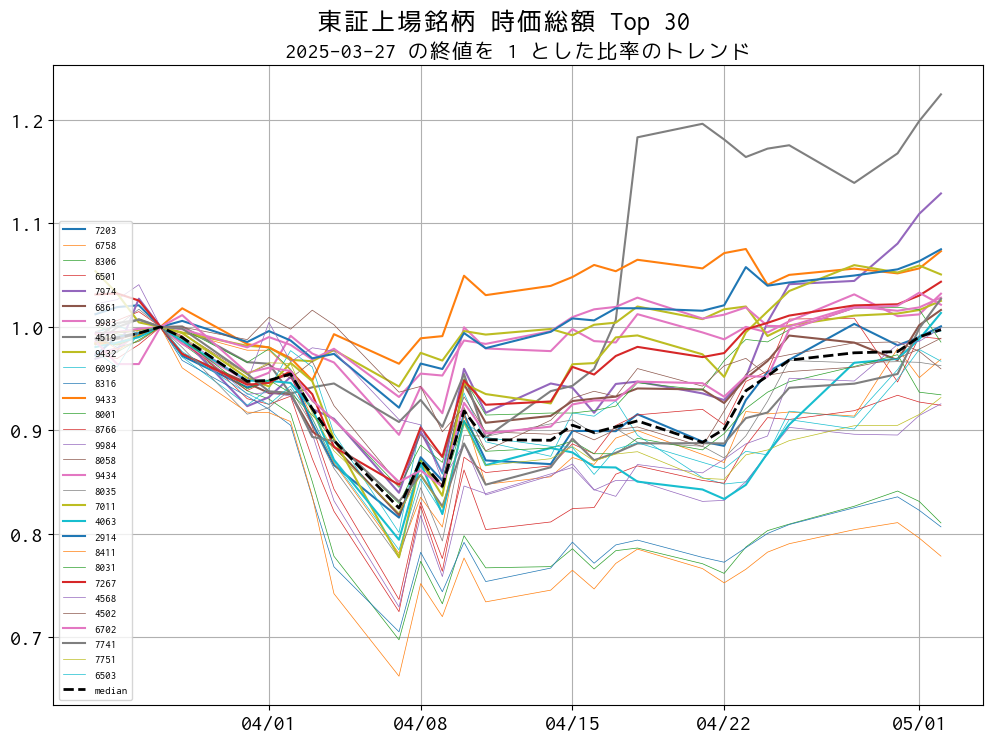

In [15]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [16]:
summary.median(axis=1)

2025-03-24    0.987860
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989738
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.954477
2025-04-03    0.920925
2025-04-04    0.890173
2025-04-07    0.824919
2025-04-08    0.870940
2025-04-09    0.846023
2025-04-10    0.918871
2025-04-11    0.890984
2025-04-14    0.890423
2025-04-15    0.905029
2025-04-16    0.897957
2025-04-17    0.903354
2025-04-18    0.909153
2025-04-21    0.888403
2025-04-22    0.901227
2025-04-23    0.938267
2025-04-24    0.952486
2025-04-25    0.967842
2025-04-28    0.974933
2025-04-30    0.976054
2025-05-01    0.990342
2025-05-02    0.997273
dtype: float64